
# K Means Clustering Project 

Using KMeans Clustering to cluster Universities into to two groups: Private and Public.

## The Data

Data frame has 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [1]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Loading the Data

In [2]:
# load file as dataframe
df = pd.read_csv('College_Data', index_col=0)

In [4]:
df.sample(7)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Bowling Green State University,No,9251,7333,3076,14,45,13699,1213,7452,3352,600,1700,81,89,21.1,14,6918,67
Hope College,Yes,1712,1483,624,37,69,2505,208,12275,4341,465,1100,72,81,12.5,40,9284,72
Stephens College,Yes,450,405,194,17,34,614,388,13900,5200,450,2150,46,63,10.9,17,9995,59
King's College,Yes,1456,1053,381,20,45,500,541,10910,5160,400,1795,66,72,15.6,37,7649,87
Texas Southern University,No,4345,3245,2604,15,85,5584,3101,7860,3360,600,1700,65,75,18.2,21,3605,10
University of Minnesota Twin Cities,No,11054,6397,3524,26,55,16502,21836,8949,3744,714,2910,88,90,12.2,37,16122,45
Brenau University,Yes,367,274,158,12,41,917,479,9592,5879,500,700,71,80,13.7,12,5935,49


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [7]:
df.describe(include='all')

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,NaN,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,NaN,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,NaN,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,NaN,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,NaN,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000


## EDA

** Creating a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column. **

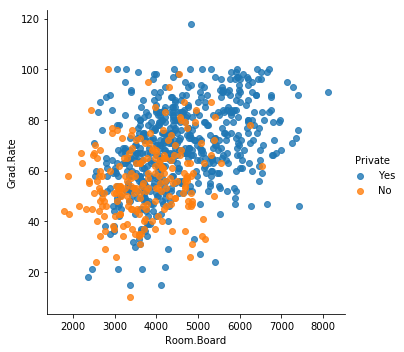

In [8]:
sns.lmplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private', fit_reg=False)

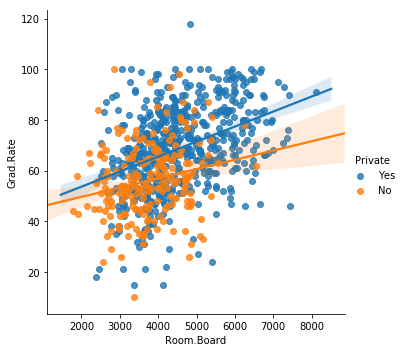

In [9]:
sns.lmplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private', fit_reg=True)

**Creating a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

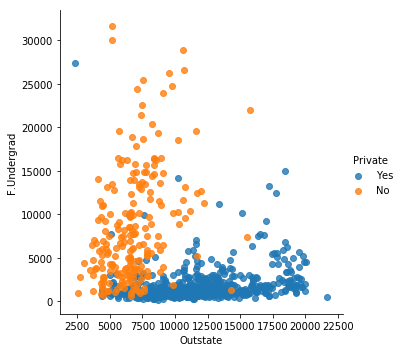

In [10]:
sns.lmplot(x='Outstate', y='F.Undergrad', data=df, hue='Private', fit_reg=False)

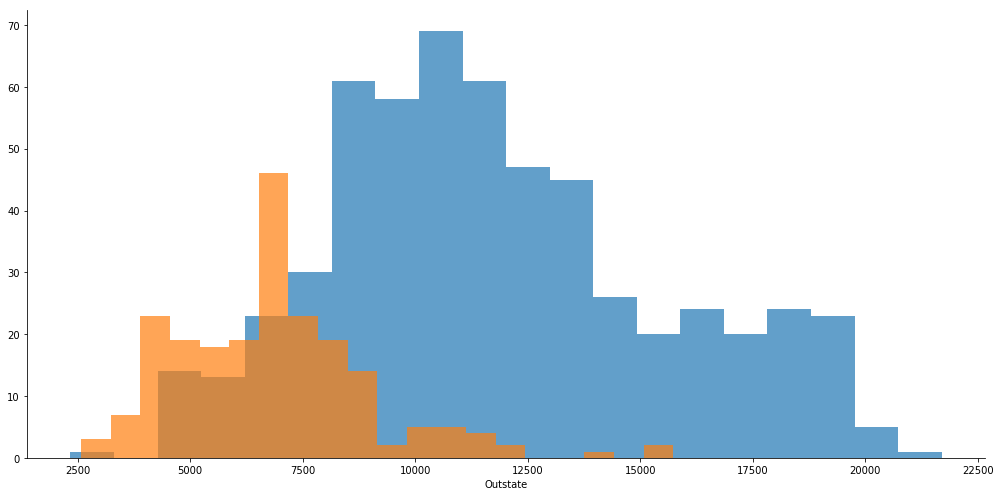

In [12]:
g = sns.FacetGrid(df, hue='Private', height=7, aspect=2)
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

**Creating a similar histogram for the Grad.Rate column.**

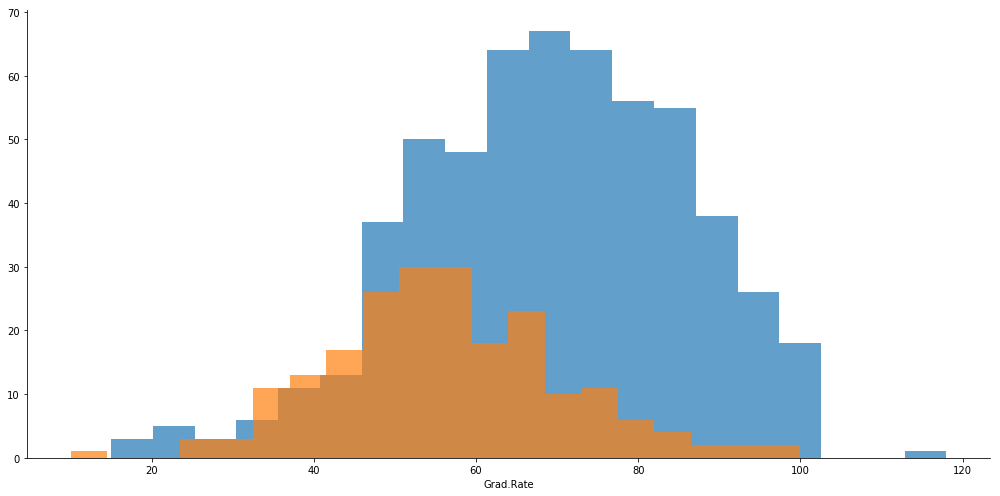

In [13]:
g = sns.FacetGrid(df, hue='Private', height=7, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

In [14]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [15]:
df['Grad.Rate']['Cazenovia College'] = 100

e:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


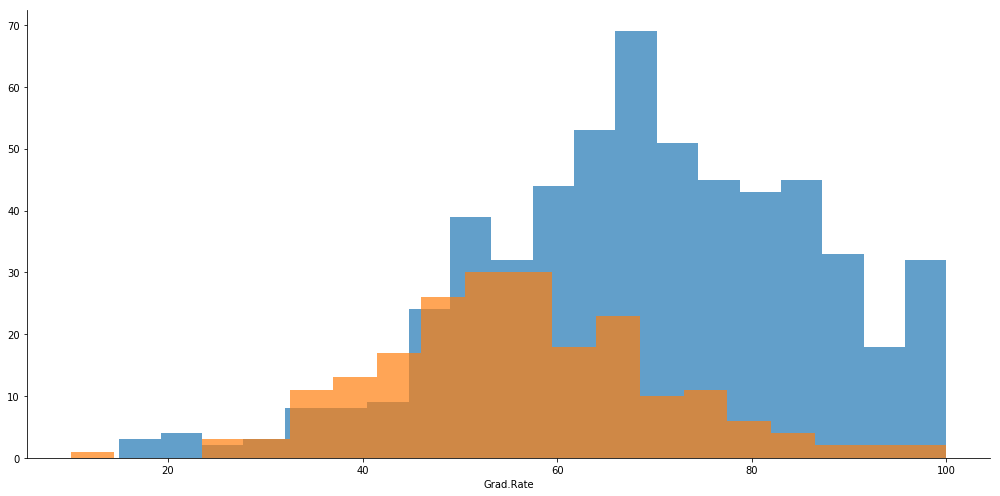

In [16]:
g = sns.FacetGrid(df, hue="Private", height=7, aspect=2)
g = g.map(plt.hist, 'Grad.Rate',bins=20, alpha=0.7)

## K Means Cluster Creation

In [17]:
from sklearn.cluster import KMeans

** Creating an instance of a K Means model with 2 clusters.**

In [18]:
kmeans = KMeans(n_clusters=2)

**Fitting the model to all the data except for the Private label.**

In [19]:
kmeans.fit(df.drop('Private', axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

## Evaluation

** Creating a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [21]:
# converter -> cluster
def converter(cluster):
    if cluster == 'Yes':
        return 1
    else:
        return 0

In [22]:
df['Cluster'] = df['Private'].apply(converter)

In [23]:
df.sample(7)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
St. Mary's College of Maryland,No,1340,695,285,42,73,1315,209,6800,4730,675,1250,84,89,11.6,23,10357,63,0
Randolph-Macon Woman's College,Yes,696,616,169,35,66,653,56,13970,6110,370,920,88,97,9.2,24,16358,68,1
University of Vermont,No,7663,6008,1735,18,51,7353,1674,15516,4928,500,990,87,90,9.9,10,12646,79,0
University of Northern Colorado,No,5530,4007,1697,12,37,8463,1498,7731,4128,540,2286,75,75,21.5,8,6309,40,0
Pacific Union College,Yes,940,668,385,20,48,1316,139,11925,3825,630,1926,48,87,12.3,12,9157,69,1
Pitzer College,Yes,1133,630,220,37,73,750,30,17688,5900,650,850,100,100,10.4,11,14820,73,1
Birmingham-Southern College,Yes,805,588,287,67,88,1376,207,11660,4325,400,900,74,79,14.0,34,8649,72,1


In [25]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

** Creating a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(df['Cluster'], kmeans.labels_))
print(classification_report(df['Cluster'], kmeans.labels_))

[[138  74]
 [531  34]]
             precision    recall  f1-score   support

          0       0.21      0.65      0.31       212
          1       0.31      0.06      0.10       565

avg / total       0.29      0.22      0.16       777

